# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [33]:
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="

In [12]:
#creating lists that will store the response data from the openweather api

lat = []
lng = []
max_temp = []
hum = []
cloudiness = []
wind_speed = []

#creating a loop for each city in the cities list and making a response for each one. 

count = 0 

#making a new cities list that I will append as the loop passes through each city in cities list. 

cities_list = []


print("Beginning Data Retrieval")
print('-----------------------------')

#creating the api call within the loop
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        cities_list.append(city)
        print(f"city name: {city}")
        count = count + 1 
    
    using this so that i don't go beyond the limit in case I did not set up the loop corrrectly 
        #time.sleep(1.01)
                   
    except: 
        print("City not found")
    continue


Beginning Data Retrieval
-----------------------------
city name: port hawkesbury
city name: vaini
city name: busselton
city name: caravelas
city name: iqaluit
city name: yellowknife
City not found
city name: kuching
city name: kahului
city name: ushuaia
City not found
city name: punta arenas
City not found
city name: batticaloa
city name: gannan
City not found
city name: rikitea
City not found
city name: tuktoyaktuk
City not found
city name: albany
city name: nikolskoye
city name: port macquarie
city name: arraial do cabo
city name: waipawa
city name: saint-augustin
city name: mataura
city name: hobart
city name: jamestown
city name: atambua
city name: shingu
city name: chokurdakh
city name: bluff
city name: hilo
city name: rocha
city name: atuona
city name: new norfolk
city name: mahebourg
city name: erzin
city name: ilulissat
city name: ribeira grande
city name: port alfred
city name: hirara
city name: lensk
city name: batagay-alyta
city name: maniitsoq
city name: isla vista
city na

city name: celestun
city name: ampanihy
city name: tilichiki
city name: bud
city name: vardo
city name: tessalit
City not found
city name: nuuk
city name: maningrida
city name: san marcos
city name: bundaberg
city name: kibiti
city name: scottsbluff
city name: kavieng
city name: lazaro cardenas
city name: sept-iles
city name: kolhapur
city name: antofagasta
city name: kruisfontein
city name: katsuura
city name: rakhiv
city name: sumbe
city name: koutiala
city name: illela
city name: minab
city name: aswan
city name: vila velha
City not found
city name: morondava
city name: shadegan
city name: hobyo
city name: hofn
city name: tual
city name: malinovoye ozero
City not found
city name: kishanpur
city name: nova olimpia
city name: alyangula
City not found
city name: rabo de peixe
city name: kaduna
city name: idrinskoye
city name: the valley
City not found
city name: gazli
City not found
city name: samarai
city name: lasa
city name: bhadra
city name: guerrero negro
city name: nara
city name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
response_dict = {
    "City": cities_list,
    "Latitude": lat, 
    "Longitude": lng,
    "Maximum Temperature": max_temp, 
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed, 
}

weatherpy = pd.DataFrame(response_dict)

In [39]:
weatherpy.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind_Speed
0,port hawkesbury,45.62,-61.36,15.51,59,1,7.70
1,vaini,15.34,74.49,25.31,87,100,3.46
2,busselton,-33.64,115.35,9.42,71,90,4.43
3,caravelas,-17.73,-39.27,21.71,73,51,4.68
4,iqaluit,63.75,-68.52,14.00,67,40,3.10


In [23]:
weatherpy.to_csv("weatherpy.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

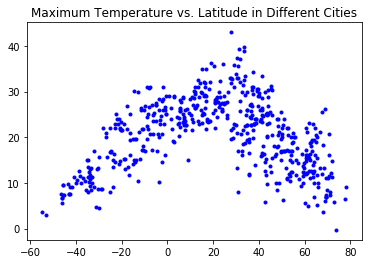

In [29]:
plt.scatter(weatherpy['Latitude'], weatherpy['Maximum Temperature'], marker=".", facecolors="blue")

plt.xlabel = ("Latitude")
plt.ylabel = ("Temperature(C)")
plt.title("Maximum Temperature vs. Latitude in Different Cities")
plt.savefig("maxtemp_vs_lat.png")

plt.show()

#### Latitude vs. Humidity Plot

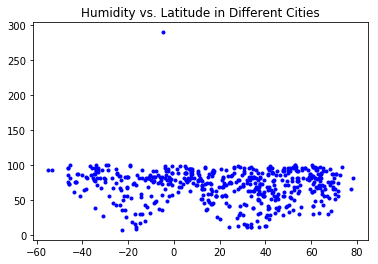

In [30]:
plt.scatter(weatherpy['Latitude'], weatherpy['Humidity'], marker=".", facecolors="blue")

plt.xlabel = ("Latitude")
plt.ylabel = ("Humidty")
plt.title("Humidity vs. Latitude in Different Cities")
plt.savefig("hum_vs_lat.png")

plt.show()

#### Latitude vs. Cloudiness Plot

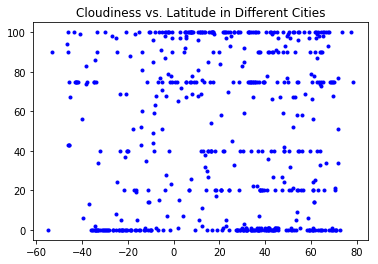

In [35]:
plt.scatter(weatherpy['Latitude'], weatherpy['Cloudiness'], marker=".", facecolors="blue")

plt.xlabel = ("Latitude")
plt.ylabel = ("Cloudiness")
plt.title("Cloudiness vs. Latitude in Different Cities")
plt.savefig("cloud_vs_lat.png")

plt.show()

#### Latitude vs. Wind Speed Plot

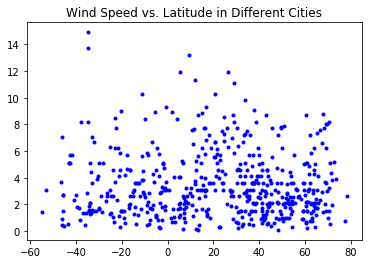

In [36]:
plt.scatter(weatherpy['Latitude'], weatherpy['Wind_Speed'], marker=".", facecolors="blue")

plt.xlabel = ("Latitude")
plt.ylabel = ("Cloudiness")
plt.title("Wind Speed vs. Latitude in Different Cities")
plt.savefig("ws_vs_lat.png")

plt.show()

1. In the temperature plot we can see that from latitude -20 to latitude 20, the tempurature is increasing (the trend - not true for all data points). Outside of this range the temperature is lower. One would expect this trend since latitudes -20 to 20 are close to the equator. The humidity plot does not necessarily follow the same trend as the temperature plot. There are quite a few cities that have relatively high humidity at the -40, -20, 20, 40 latitudes. But, we do see that at latitude 0 the highest humidity point can be found, which is expected. 
 
2. The cloudiness and wind speed plot actually reminded me of a NOVA documentary about the applications of mathematics. There are some things that can't be modeled acurately by mathematical models like some weather events and I am pretty sure cloudiness and wind speed may have been one of them. In any case, as can be seen in the plot there is no observable trend that can be seen in these two plots. 
 
